<a href="https://colab.research.google.com/github/webcoder123/Project/blob/main/Matches_IPl_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Complete analysis about IPL has been done in this data.**

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading and reading the data set

data = matches

In [39]:
matches=pd.read_csv("/content/matches_ipl_Analysis - matches_ipl_Analysis.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# New Section

Checking the dataset's information

In [40]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [41]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [42]:
matches.nunique()

id                 636
season              10
city                30
date               450
team1               14
team2               14
toss_winner         14
toss_decision        2
result               3
dl_applied           2
winner              14
win_by_runs         86
win_by_wickets      11
player_of_match    201
venue               35
umpire1             44
umpire2             45
umpire3              0
dtype: int64

In [43]:
matches.rename(columns={'win_by_runs':'Bat_1', 'win_by_wickets':'Ball_1'},inplace=True)

In [44]:
print("City in which most matches have been won",matches['city'].value_counts().idxmax())
print("Team that has won most matches: ",matches['winner'].value_counts().idxmax())
print('Player who has been man of the matches most time',matches['player_of_match'].value_counts().idxmax())
print('Most frequent umpire 1 :',matches['umpire1'].value_counts().idxmax())
print('Most frequent umpire 2 :',matches['umpire2'].value_counts().idxmax())

City in which most matches have been won Mumbai
Team that has won most matches:  Mumbai Indians
Player who has been man of the matches most time CH Gayle
Most frequent umpire 1 : HDPK Dharmasena
Most frequent umpire 2 : SJA Taufel


1. We are going to replace the missing values with the above outputs for their respctive columns.
2. Since most values are null in umpire 3 we will replace them by NA.


In [45]:
matches['city'].fillna(value='Mumbai', inplace=True)
matches['winner'].fillna(value='Mumbai Indians',inplace=True)
matches['player_of_match'].fillna(value='CH Gayle',inplace=True)
matches['umpire1'].fillna(value='HDPK Dharmasena',inplace=True)
matches['umpire2'].fillna(value='SJA Taufel',inplace=True)
matches['umpire3'].fillna(value='NA',inplace=True)

In [46]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
Bat_1              0
Ball_1             0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [47]:
matches.duplicated().sum()

0

We do not have any duplicated values.

# Data Visualization

**Finding top teams and players**

<ipython-input-60-690f8a7deb35>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index,y=data.values,palette='rocket')


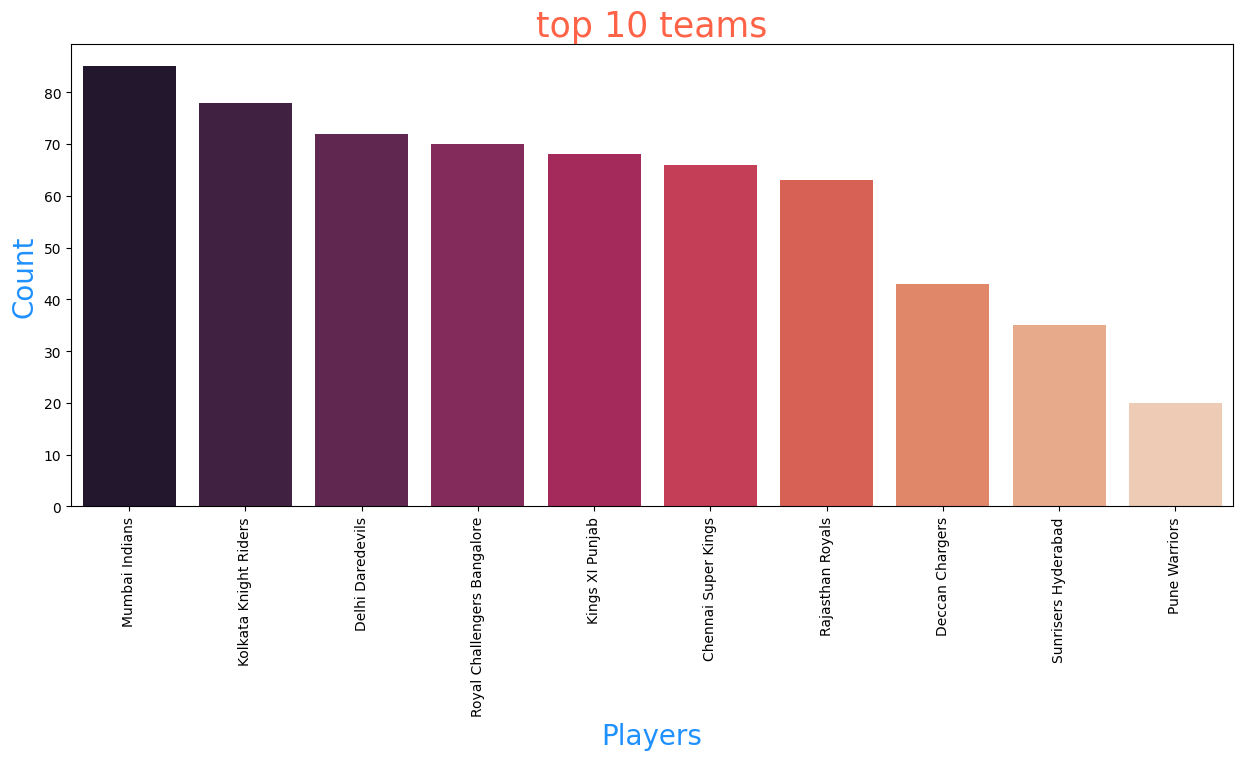

In [60]:
plt.figure(figsize=(15,6))
style1={'family' : 'Times new Roman','color':'Tomato','size':25}
style2={'family' : 'Times new Roman','color': "DodgerBlue",'size':20}
data=matches['toss_winner'].value_counts()[:10]
sns.barplot(x=data.index,y=data.values,palette='rocket')
plt.title('top 10 teams',fontdict=style1)
plt.xlabel('Players', fontdict=style2)
plt.ylabel('Count', fontdict=style2)
plt.xticks(rotation=90)
plt.show()

**Finding the factors affectiong the victory**

In [61]:
matches.info()
matches = matches.convert_dtypes()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               636 non-null    Int64 
 1   city             636 non-null    string
 2   date             636 non-null    string
 3   team1            636 non-null    string
 4   team2            636 non-null    string
 5   toss_winner      636 non-null    string
 6   toss_decision    636 non-null    string
 7   result           636 non-null    string
 8   winner           636 non-null    string
 9   Bat_1            636 non-null    Int64 
 10  Ball_1           636 non-null    Int64 
 11  player_of_match  636 non-null    string
 12  venue            636 non-null    string
 13  umpire1          636 non-null    string
 14  umpire2          636 non-null    string
 15  umpire3          0 non-null      Int64 
dtypes: Int64(4), string(12)
memory usage: 82.1 KB


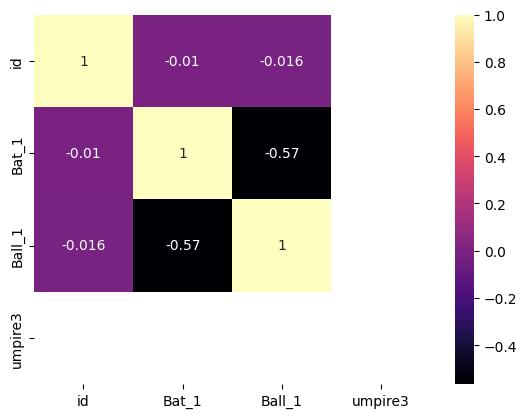

In [62]:
numeric_matches = matches.select_dtypes(include=["number"])
fac = sns.heatmap(numeric_matches.corr(), annot=True, cmap='magma')

In [69]:
matches.columns

Index(['id', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'result', 'winner', 'Bat_1', 'Ball_1', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'],
      dtype='object')

<ipython-input-71-fa79205b3db7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="toss_winner",data=matches, palette='twilight_shifted')


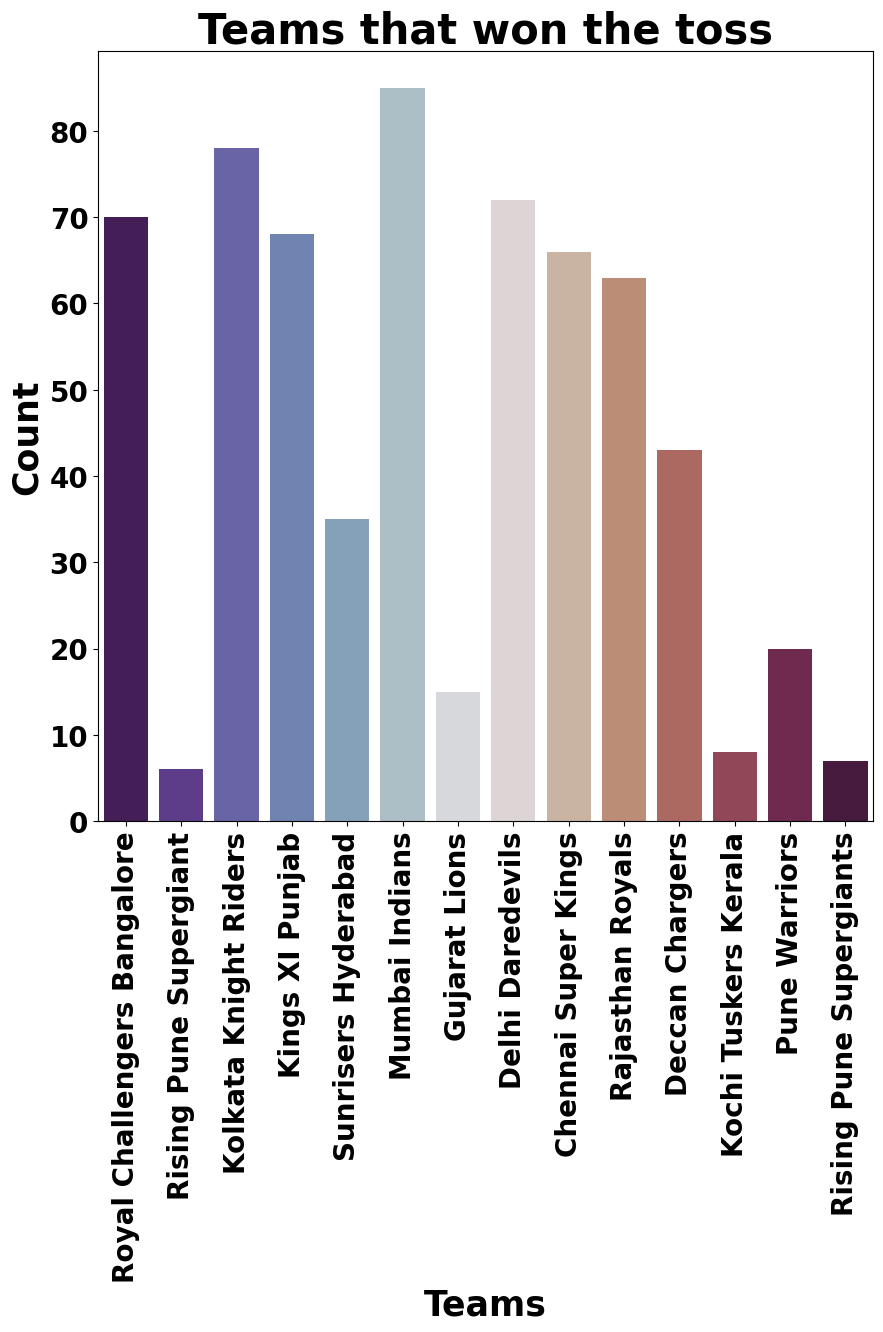

In [71]:
plt.figure(figsize=(10,10))

sns.countplot(x="toss_winner",data=matches, palette='twilight_shifted')

plt.xlabel('Teams',fontsize=25,fontweight="bold")
plt.ylabel('Count',fontsize=25,fontweight="bold")

plt.title("Teams that won the toss",fontweight="bold",size=30)

plt.xticks(rotation=90,fontweight="bold",size=20)
plt.yticks(fontweight="bold",size=20)
plt.show()


In [76]:
print('Team that won most matches by batting first : ',matches.loc[matches["Bat_1"].ge(1)])

Team that won most matches by batting first :        id           city        date                        team1  \
0      1      Hyderabad  2017-04-05          Sunrisers Hyderabad   
4      5      Bangalore  2017-04-08  Royal Challengers Bangalore   
8      9           Pune  2017-04-11             Delhi Daredevils   
13    14        Kolkata  2017-04-15        Kolkata Knight Riders   
14    15          Delhi  2017-04-15             Delhi Daredevils   
..   ...            ...         ...                          ...   
624  625  Visakhapatnam  2016-05-17             Delhi Daredevils   
625  626      Bangalore  2016-05-18  Royal Challengers Bangalore   
630  631        Kolkata  2016-05-22        Kolkata Knight Riders   
633  634          Delhi  2016-05-25          Sunrisers Hyderabad   
635  636      Bangalore  2016-05-29          Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
0    Royal Challengers Bangalore  Royal Challengers Banga

In [78]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               636 non-null    Int64 
 1   city             636 non-null    string
 2   date             636 non-null    string
 3   team1            636 non-null    string
 4   team2            636 non-null    string
 5   toss_winner      636 non-null    string
 6   toss_decision    636 non-null    string
 7   result           636 non-null    string
 8   winner           636 non-null    string
 9   Bat_1            636 non-null    Int64 
 10  Ball_1           636 non-null    Int64 
 11  player_of_match  636 non-null    string
 12  venue            636 non-null    string
 13  umpire1          636 non-null    string
 14  umpire2          636 non-null    string
 15  umpire3          0 non-null      Int64 
dtypes: Int64(4), string(12)
memory usage: 82.1 KB


**Best team in mumbai indians**

Best player is ch gayle

Thanks you